In [18]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, mean_absolute_error, confusion_matrix

nltk.download('punkt')
nltk.download('stopwords')
# nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package punkt to C:\Users\KHUSHI
[nltk_data]     GUPTA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\KHUSHI
[nltk_data]     GUPTA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
df = pd.read_csv("customer_support_tickets.csv")
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [20]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [21]:
df.info()
df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

,Customer Name,Customer Email,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
count,8469,8469,8469,8469,8469,8469,8469,8469,8469,2769,8469,8469,5650,2769
unique,8028,8320,3,42,730,5,16,8077,3,2769,4,4,5470,2728
top,Michael Garcia,asmith@example.com,Male,Canon EOS,2020-10-21,Refund request,Refund request,I'm having an issue with the {product_purchase...,Pending Customer Response,We seat culture plan.,Medium,Email,2023-06-01 20:45:39,2023-06-01 17:14:42
freq,5,4,2896,240,24,1752,576,25,2881,1,2192,2143,3,3


In [22]:
print(df['Ticket Description'].value_counts(dropna=False))
df = df.dropna(subset=['Ticket Description'])  # Drop rows where ticket_type is missing
df['Ticket Description'] = df['Ticket Description'].astype(str)


Ticket Description
I'm having an issue with the {product_purchased}. Please assist. This problem started occurring after the recent software update. I haven't made any other changes to the device.                                                                                                                                                   25
I'm having an issue with the {product_purchased}. Please assist. I'm concerned about the security of my {product_purchased} and would like to ensure that my data is safe.                                                                                                                                                          25
I'm having an issue with the {product_purchased}. Please assist. I need assistance as soon as possible because it's affecting my work and productivity.                                                                                                                                                                             25


In [23]:
print(df.columns)

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')


In [24]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in STOPWORDS]
    return ' '.join(tokens)

df['clean_text'] = df['Ticket Description'].astype(str).apply(clean_text)


In [25]:
# Classification model
X = df['clean_text']
y_class = df['Ticket Type']
y_reg = df['Time to Resolution']

C:\Users\KHUSHI GUPTA\AppData\Local\Temp\ipykernel_11316\3319618462.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


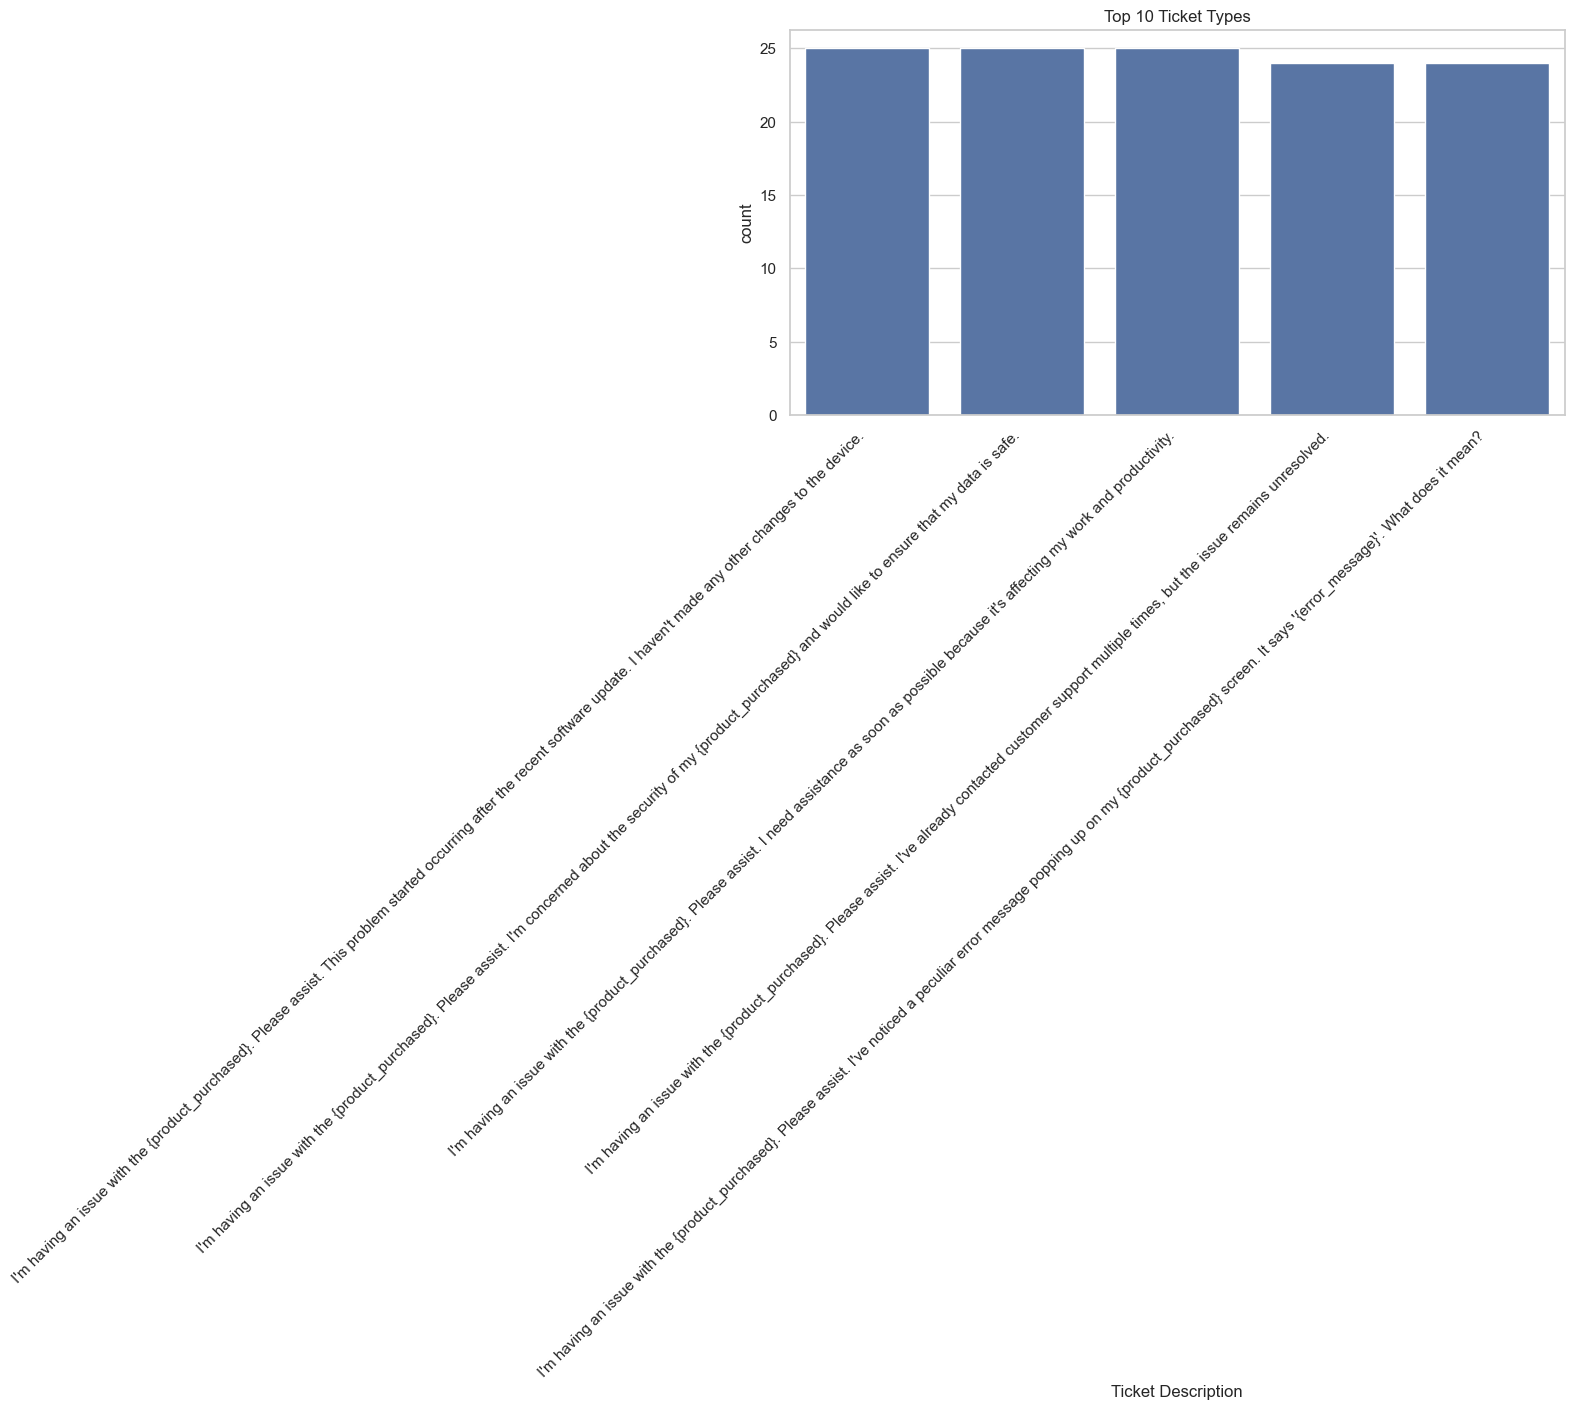

In [26]:
# Get top 10 most frequent categories
top_categories = df['Ticket Description'].value_counts().nlargest(5).index

# Filter DataFrame to only include those
filtered_df = df[df['Ticket Description'].isin(top_categories)]

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
ax = sns.countplot(data=filtered_df, x='Ticket Description', order=top_categories)

# Optional: Rotate + format
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title("Top 10 Ticket Types")

plt.show()


In [27]:
## Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer(max_features=3000)
X_vec = vectorizer.fit_transform(df['clean_text'])

In [28]:
## train test split
X_train, X_test, y_train_cls, y_test_cls = train_test_split(X_vec, y_class, test_size=0.2, random_state=42)
model_cls = LogisticRegression()
model_cls.fit(X_train, y_train_cls)

print(classification_report(y_test_cls, model_cls.predict(X_test)))

                      precision    recall  f1-score   support

     Billing inquiry       0.15      0.10      0.12       357
Cancellation request       0.19      0.20      0.20       327
     Product inquiry       0.19      0.20      0.20       316
      Refund request       0.20      0.23      0.21       345
     Technical issue       0.21      0.24      0.22       349

            accuracy                           0.19      1694
           macro avg       0.19      0.19      0.19      1694
        weighted avg       0.19      0.19      0.19      1694



In [29]:
## model training 
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train_cls)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [30]:
## model evaluation 
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred))
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred))


Confusion Matrix:
 [[36 69 70 97 85]
 [44 66 72 70 75]
 [49 58 63 72 74]
 [62 64 57 78 84]
 [49 82 65 69 84]]

Classification Report:
                       precision    recall  f1-score   support

     Billing inquiry       0.15      0.10      0.12       357
Cancellation request       0.19      0.20      0.20       327
     Product inquiry       0.19      0.20      0.20       316
      Refund request       0.20      0.23      0.21       345
     Technical issue       0.21      0.24      0.22       349

            accuracy                           0.19      1694
           macro avg       0.19      0.19      0.19      1694
        weighted avg       0.19      0.19      0.19      1694



In [31]:
import numpy as np
X_train = np.nan_to_num(X_train, nan=0.0)
X_test = np.nan_to_num(X_test, nan=0.0)

In [32]:
# model_reg = RandomForestRegressor(random_state=42)
# model_reg.fit(X_train, y_train_reg)
from sklearn.ensemble import RandomForestClassifier

model_cls = RandomForestClassifier(random_state=42)
model_cls.fit(X_train, y_train_cls)  # y_train_cls should contain class labels like "Cancellation request"


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
import os

# Create 'model' directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Now save
joblib.dump(model, 'model/classifier.pkl')
joblib.dump(vectorizer, 'model/vectorizer.pkl')

['model/vectorizer.pkl']

In [35]:
# Load model and vectorizer
model = joblib.load('model/classifier.pkl')
vectorizer = joblib.load('model/vectorizer.pkl')

sample = ["I need help with my software installation. It crashes every time."]
sample_cleaned = [clean_text(sample[0])]
sample_vector = vectorizer.transform(sample_cleaned)
prediction = model.predict(sample_vector)

print("Predicted Category:", prediction[0])


Predicted Category: Refund request


In [36]:
try:
    sample_cleaned = [clean_text(user_input)]
    sample_vector = vectorizer.transform(sample_cleaned)
    prediction = model.predict(sample_vector)
    print("Predicted Category:", prediction[0])
except Exception as e:
    print("Error:", e)

Error: name 'user_input' is not defined


In [37]:
import sqlite3

# Connect to the database (must match the name used in app.py)
conn = sqlite3.connect('ticket_db.db')
cursor = conn.cursor()

# Show the structure of the 'complaints' table
cursor.execute("PRAGMA table_info(complaints);")
table_info = cursor.fetchall()

# Print each column
for column in table_info:
    print(column)

conn.close()

import sqlite3

conn = sqlite3.connect('ticket_db.db')
conn.execute('''
CREATE TABLE IF NOT EXISTS complaints (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    ticket_text TEXT,
    predicted_category TEXT,
    predicted_time REAL
)
''')
conn.commit()
conn.close()


(0, 'id', 'INTEGER', 0, None, 1)
(1, 'ticket_text', 'TEXT', 0, None, 0)
(2, 'predicted_category', 'TEXT', 0, None, 0)
(3, 'predicted_time', 'REAL', 0, None, 0)
